# Regressão Polinomial - Gradiente Descendente

- Aplicação do gradiente descendente para minimizar o erro quadrático
- $f(x) = x^{77} + 5.2$

Dataset: [(9.719250875750497, 1.1161562974512555e+76), (5.334930773781647, 9.748026590849769e+55), (-9.044539528094013, -4.3828590819938765e+73), (-3.444510818202298, -2.2846600486428497e+41), (7.3139435987665635, 3.464764623921466e+66), (-1.355591772702173, -14925441154.409754), (1.8801921992358892, 1.298891815830813e+21), (-0.40155130698843067, 5.2), (2.251658363901104, 1.3889681469651988e+27), (-1.1827548137192139, -410098.5766091301), (9.275004996804292, 3.042213742977587e+74), (-6.863622215697649, -2.5978231780018435e+64), (7.035285451638348, 1.7405748146198685e+65), (-3.0271039028522058, -1.0942190137080473e+37), (1.4198548635951092, 528182993571.38275), (-3.88478417163995, -2.405752564745742e+45), (1.581732681630852, 2154010329520116.8), (-1.8336517338483365, -1.8853748782850756e+20), (5.697997739389413, 1.5510114017272745e+58), (0.31704979464855043, 5.2), (3.672311508252564, 3.164772897084902e+43), (4.068444701843092, 8.433117357916053e+46), (-8.610879624557235, -9.969167465717

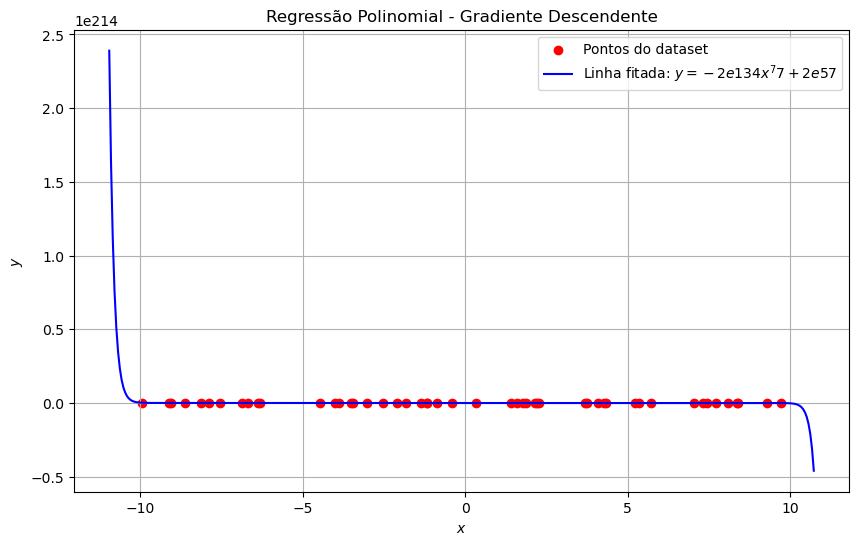

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

# Gerando o dataset
dataset = [(x, x**77 + 5.2) for x in [random.uniform(-10, 10) for _ in range(50)]]
print(f"Dataset: {dataset}")

# Função para calcular as derivadas parciais
def gradient(a, b):
    grada = sum([-2*(dataset[i][1] - a*dataset[i][0]**77 - b)*(dataset[i][0]**77) for i in range(len(dataset))])
    gradb = sum([-2*(dataset[i][1] - a*dataset[i][0]**77 - b) for i in range(len(dataset))])
    return [grada, gradb]

def dist(anterior,novo):
  zs = zip(anterior,novo)
  acc = 0
  for [p1,p2] in zs:
    acc += (p1-p2)**2

  return math.sqrt(acc)

# Função de gradiente descendente
def grad_desc(lr, xn, yn, tol, max_iter=1000000):
    d = float('inf')
    k = 0
    while d > tol and k < max_iter:
        grada, gradb = gradient(xn, yn)
        xn1 = xn - lr * grada
        yn1 = yn - lr * gradb
        d = dist([xn, yn], [xn1, yn1])
        
        # Verificação para evitar overflow
        if any(abs(val) > 1e100 for val in [xn1, yn1, d]):
            print(f"Valores muito grandes detectados na iteração {k}. Interrompendo.")
            break
        
        xn, yn = xn1, yn1
        k += 1
    return [xn1, yn1, k]

def format_exponential(number):
    formatted_number = f"{number:.1e}"
    parts = formatted_number.split('e')
    return f"{int(float(parts[0]))}e{int(parts[1])}"

# Executando o gradiente descendente
z = grad_desc(1e-18, 1, 0, 1e-18)
print(f"z: {z}")

x = [point[0] for point in dataset]
y = [point[1] for point in dataset]

# Linha fitada baseada no resultado do algoritmo
a, b = z[0], z[1]
# Adiciona mais pontos entre o mínimo e máximo para suavizar o gráfico
x1 = np.linspace(min(x) - 1, max(x) + 1, 400) 
y1 = [a * xx**77 + b for xx in x1]

# Plot dos pontos e da linha fitada
plt.figure(figsize=(10, 6))
# Pontos
plt.scatter(x, y, color='red', label='Pontos do dataset')
# Linha fitada
plt.plot(x1, y1, color='blue', label=f'Linha fitada: $y = {format_exponential(a)}x^{77} + {format_exponential(b)}$')

# Título e legendas do plot
plt.title('Regressão Polinomial - Gradiente Descendente')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)

plt.show()